In [1]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from matplotlib.legend_handler import HandlerTuple
import matplotlib.pyplot as plt
#mean length by coverage, show motrpac vs gregor
#add deletions, DONE
#methylation? not a hurry, methylation clustered on a PCA


In [2]:
file_dir = "/oak/stanford/groups/smontgom/jonnguye/repos/HiFi-human-WGS-WDL/SV_STATS"
files = os.listdir(file_dir)

In [3]:
all_data = []

for file in [x for x in files if ".txt" in x and 'coverage' not in x and 'read_length' not in x]:
    with open(os.path.join(file_dir,file)) as fhand:
        data = {"ID":file}
        if "GSS" in file:
            data["CONSORTIUM"] = "GSS"
        else:
            data["CONSORTIUM"] = "MOTRPAC"
        for line in fhand:
            row = line.strip().split()
            data[row[1]] = row[0]
        all_data.append(data)

df = pd.DataFrame(all_data)
df

,ID,CONSORTIUM,DEL,DUP,INS,INV
0,GSS191814.txt,GSS,9336,517,12835,99
1,GSS228799.txt,GSS,9455,520,13059,88
2,GSS228669.txt,GSS,9584,490,12878,103
3,GSS250159.txt,GSS,9609,481,12863,103
4,GSS125794.txt,GSS,9353,502,12742,103
...,...,...,...,...,...,...
169,GSS288689.txt,GSS,9282,472,12701,89
170,GSS174704.txt,GSS,9471,523,13170,102
171,GSS156534.txt,GSS,9452,489,12951,100
172,GSS112387.txt,GSS,9407,524,12828,94


In [4]:
df[["DUP","INS","INV","DEL"]] = df[["DUP","INS","INV","DEL"]].apply(pd.to_numeric, errors='coerce')

In [5]:
dims = (5, 5)

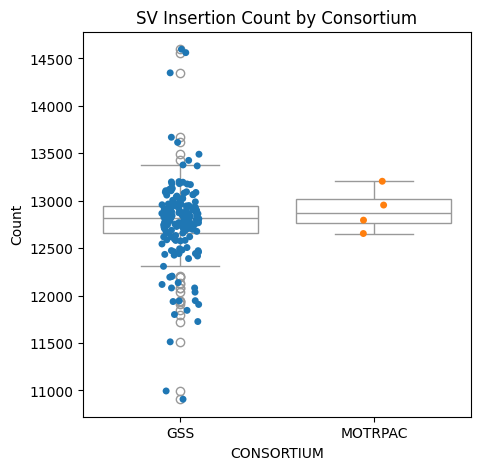

In [6]:
fig, ax = pyplot.subplots(figsize=dims)
sns.boxplot(data=df, x="CONSORTIUM", y="INS",color="white")
sns.stripplot(data=df, x="CONSORTIUM", y="INS",
              hue="CONSORTIUM")
ax.set_title('SV Insertion Count by Consortium')
ax.set(ylabel='Count')
plt.savefig('INS.png', bbox_inches='tight')

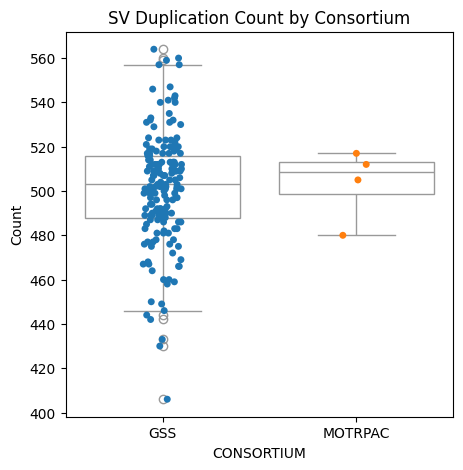

In [7]:
fig, ax = pyplot.subplots(figsize=dims)
sns.boxplot(data=df, x="CONSORTIUM", y="DUP",color="white")
sns.stripplot(data=df, x="CONSORTIUM", y="DUP",
              hue="CONSORTIUM")
ax.set_title('SV Duplication Count by Consortium')
ax.set(ylabel='Count')
plt.savefig('DUP.png', bbox_inches='tight')

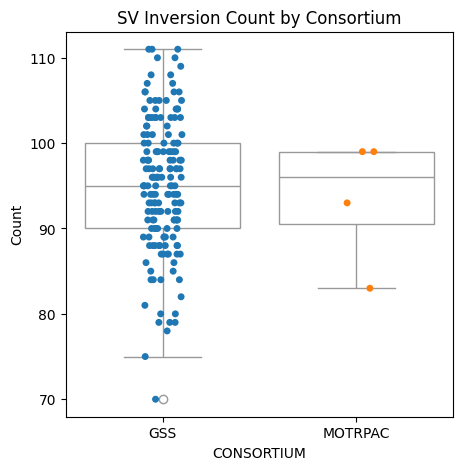

In [8]:
fig, ax = pyplot.subplots(figsize=dims)
sns.boxplot(data=df, x="CONSORTIUM", y="INV",color="white")
sns.stripplot(data=df, x="CONSORTIUM", y="INV",
              hue="CONSORTIUM")
ax.set_title('SV Inversion Count by Consortium')
ax.set(ylabel='Count')
plt.savefig('INV.png', bbox_inches='tight')

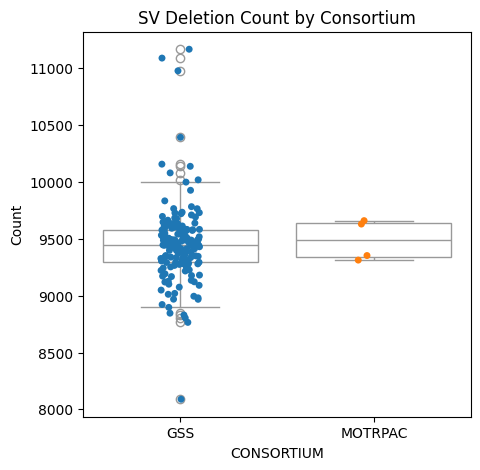

In [9]:
fig, ax = pyplot.subplots(figsize=dims)
sns.boxplot(data=df, x="CONSORTIUM", y="DEL",color="white")
sns.stripplot(data=df, x="CONSORTIUM", y="DEL",
              hue="CONSORTIUM")
ax.set_title('SV Deletion Count by Consortium')
ax.set(ylabel='Count')
plt.savefig('DEL.png', bbox_inches='tight')

In [15]:
all_data = []

for file in [x for x in files if "coverage" in x and 'txt' in x]:
    with open(os.path.join(file_dir,file)) as fhand:
        data = {"ID":file}
        if "GSS" in file:
            data["CONSORTIUM"] = "GSS"
            data["ID"] = data["ID"][0:9]
        else:
            data["CONSORTIUM"] = "MOTRPAC"
            data["ID"] = data["ID"][0:5]
        for line in fhand:
            data["COVERAGE"] = line.strip()
        all_data.append(data)

coverage = pd.DataFrame(all_data)
coverage

,ID,CONSORTIUM,COVERAGE
0,GSS165554,GSS,32.27
1,GSS175087,GSS,33.65
2,GSS163617,GSS,28.86
3,GSS237629,GSS,12.70
4,GSS267889,GSS,35.94
...,...,...,...
169,GSS236129,GSS,33.46
170,GSS189454,GSS,37.83
171,GSS228669,GSS,34.38
172,GSS157714,GSS,33.88


In [16]:
all_data = []

for file in [x for x in files if "read_length" in x and "txt" in x]:
    with open(os.path.join(file_dir,file)) as fhand:
        data = {"ID":file}
        if "GSS" in file:
            data["CONSORTIUM"] = "GSS"
            data["ID"] = data["ID"][0:9]
        else:
            data["CONSORTIUM"] = "MOTRPAC"
            data["ID"] = data["ID"][0:5]
        for line in fhand:
            data["MEAN_READ_LENGTH"] = line.strip()
        all_data.append(data)

read_length = pd.DataFrame(all_data)
read_length

,ID,CONSORTIUM,MEAN_READ_LENGTH
0,GSS256559,GSS,13522
1,GSS163617,GSS,13773
2,GSS115017,GSS,12508
3,GSS293189,GSS,11639
4,GSS289459,GSS,10954
...,...,...,...
169,GSS236829,GSS,12569
170,GSS220319,GSS,15771
171,GSS112384,GSS,15340
172,GSS165757,GSS,12695


In [18]:
join = read_length.merge(coverage)

In [22]:
join[["MEAN_READ_LENGTH","COVERAGE"]] = join[["MEAN_READ_LENGTH","COVERAGE"]].apply(pd.to_numeric, errors='coerce')

In [24]:
join = join[join["COVERAGE"] >= 25]

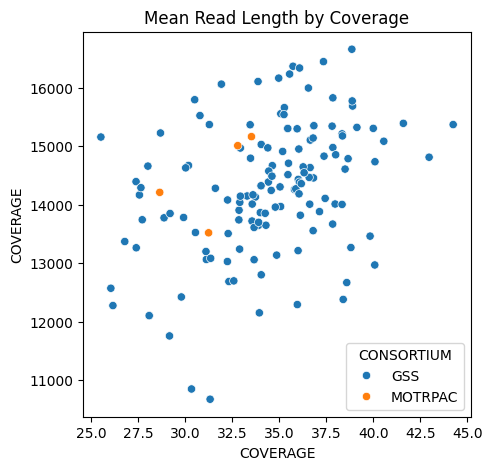

In [25]:
fig, ax = pyplot.subplots(figsize=dims)
sns.scatterplot(data=join, x="COVERAGE", y="MEAN_READ_LENGTH",hue="CONSORTIUM")
ax.set_title('Mean Read Length by Coverage')
ax.set(ylabel='MEAN_READ_LENGTH')
ax.set(ylabel='COVERAGE')
plt.savefig('MRL_COVEARGE.png', bbox_inches='tight')